In [1]:
### Practice Project 3
print("*************************************")
print(" \033[1m" + "Flip Robo Practice Project Phase 3" + "\033[0m")
print("*************************************")
print("  OLUWAJOBA FATOLA  \n  Flip Robo Technology Internship")
print("\n")

*************************************
 Flip Robo Practice Project Phase 3
*************************************
  OLUWAJOBA FATOLA  
  Flip Robo Technology Internship




In [2]:
print("---------------------------------\n")
print("\033[1m" + "Glass Identification\n" + "\033[0m")
print("---------------------------------\n")

---------------------------------

Glass Identification

---------------------------------



# Loading Libraries

In [183]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # basic visualization libraries
from IPython.display import display
import qgrid
%matplotlib inline
from matplotlib  import style
import seaborn as sns #clean columns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score, recall_score, precision_score, roc_auc_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from sklearn.feature_selection import SelectKBest, chi2, f_classif, RFECV
from scipy.stats import mannwhitneyu
import dataframe_image as dfi
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
import skillsnetwork
from scipy.stats import norm
from scipy import stats
from scipy.stats.mstats import winsorize
import tkinter as tk
from tkinter import messagebox

# Loading the Dataset

In [72]:
# Load the dataset (replace 'glass.csv' with your actual file)
data = pd.read_csv('glass.csv', header=None)  # Load data without header

In [73]:
data

,0,1,2,3,4,5,6,7,8,9,10
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [74]:
# Define the column names
column_names = ['Id number', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type of glass']

In [75]:
# Assign the defined column names to the DataFrame
data.columns = column_names

In [76]:
data

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


# About the Data

In [77]:
# Display basic information about the dataset
data.info()

# Display the first few rows of the dataset
data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id number      214 non-null    int64  
 1   RI             214 non-null    float64
 2   Na             214 non-null    float64
 3   Mg             214 non-null    float64
 4   Al             214 non-null    float64
 5   Si             214 non-null    float64
 6   K              214 non-null    float64
 7   Ca             214 non-null    float64
 8   Ba             214 non-null    float64
 9   Fe             214 non-null    float64
 10  Type of glass  214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [78]:
# Generate statistical summaries of the dataset
data.describe()

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


# Data Preprocessing

In [79]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Id number        0
RI               0
Na               0
Mg               0
Al               0
Si               0
K                0
Ca               0
Ba               0
Fe               0
Type of glass    0
dtype: int64


# EDA and Data Visualisation

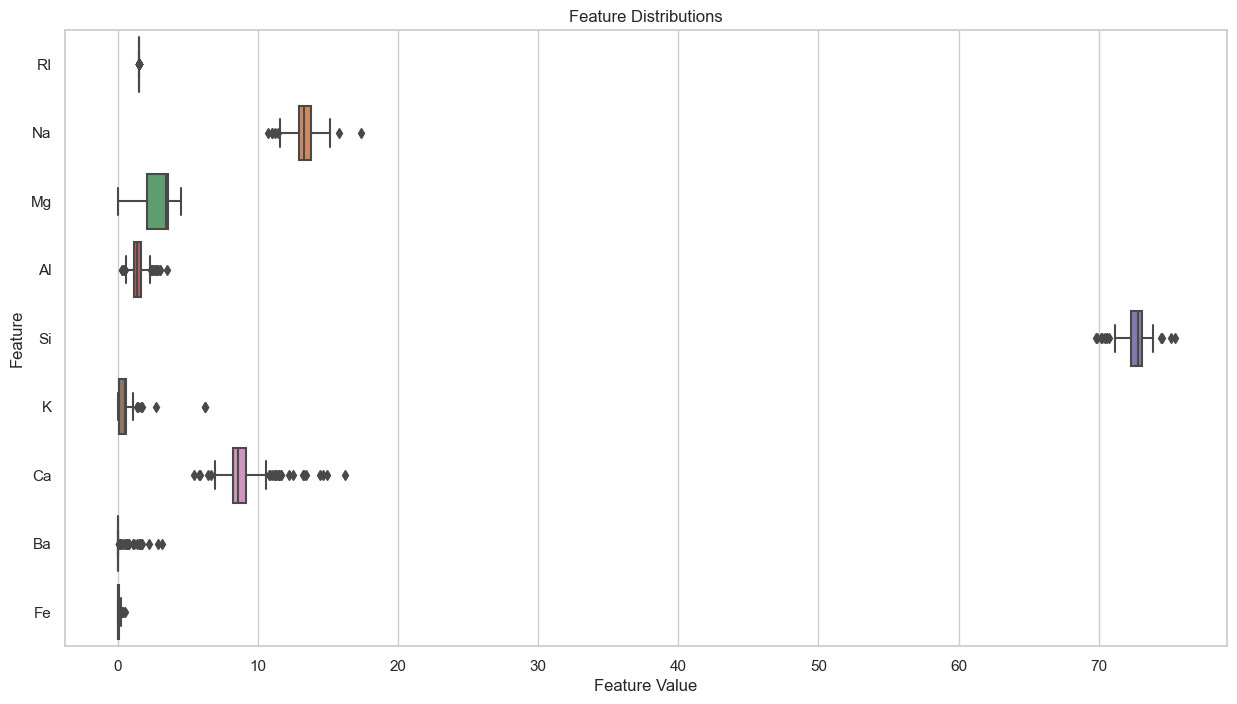

In [85]:
# Visualize feature distributions
plt.figure(figsize=(15, 8))
sns.set(style="whitegrid")
sns.boxplot(data=data.drop(columns=['Id number', 'Type of glass']), orient='h')
plt.title('Feature Distributions')
plt.xlabel('Feature Value')
plt.ylabel('Feature')
plt.show()

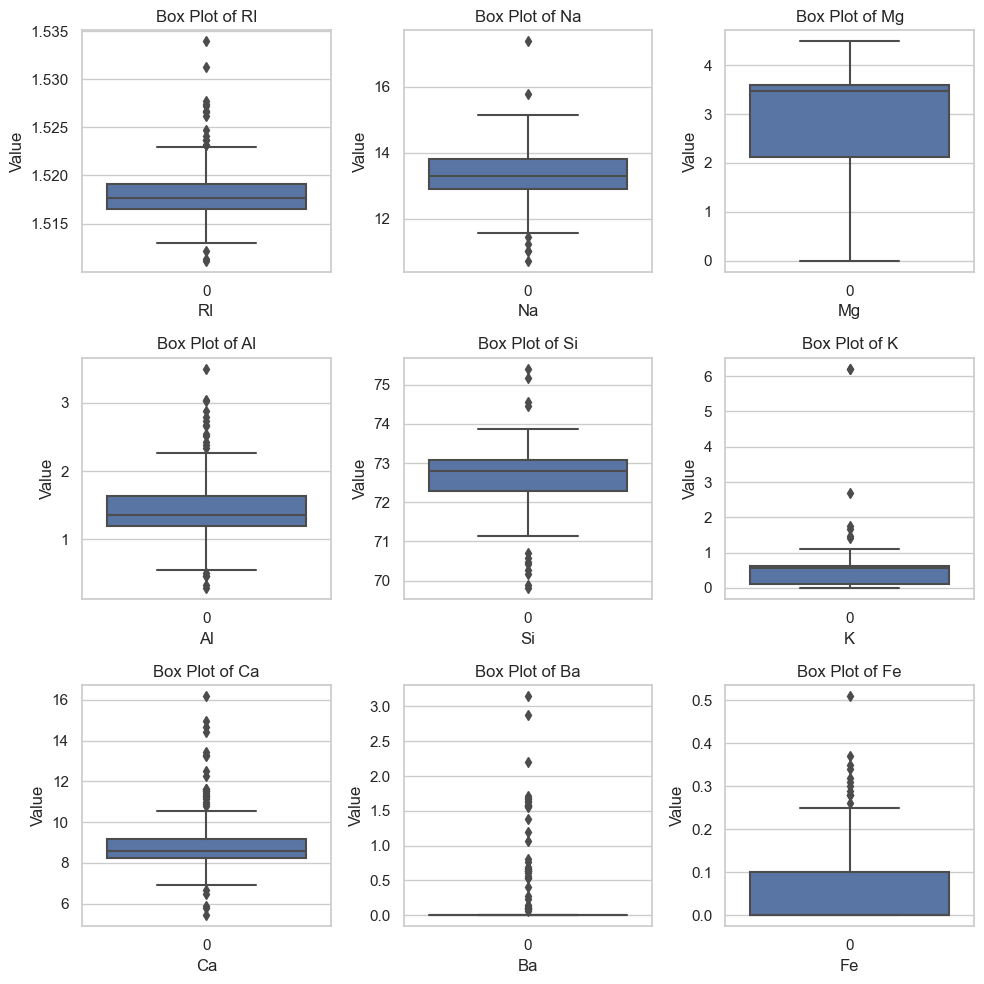

In [103]:
# Select columns for visualization (excluding Id number and Type of glass)
columns_to_visualize = data.columns[1:-1]

# Create individual box plots for each feature
plt.figure(figsize=(10, 10))
sns.set(style="whitegrid")
for column in columns_to_visualize:
    plt.subplot(3, 3, columns_to_visualize.get_loc(column) + 1)
    sns.boxplot(data=data[column])
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Value')
plt.tight_layout()
plt.show()

In [127]:
# Calculate z-scores for each feature
z_scores = (data.drop(columns=['Id number', 'Type of glass']) - data.drop(columns=['Id number', 'Type of glass']).mean()) / data.drop(columns=['Id number', 'Type of glass']).std()

# Identify and print outliers using z-scores
outliers = z_scores[(z_scores.abs() > 3).any(axis=1)]
print("Outliers")
outliers

Outliers


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
105,2.102360,-2.397553,-1.861147,0.871460,-0.595103,0.479834,3.009540,-0.352051,2.904294
106,4.242726,-3.279254,-1.861147,1.312104,-3.667872,0.127177,3.051700,5.983182,2.288522
107,5.125215,-1.356656,-1.861147,-0.891115,-3.215994,-0.578137,5.082401,-0.352051,1.878008
110,2.724712,-2.666962,-1.861147,-1.351788,0.721798,-0.762132,4.021377,-0.352051,-0.585079
111,2.971677,-2.924125,-1.861147,-1.391846,0.553957,-0.762132,4.218124,-0.352051,-0.585079
112,3.096807,-0.940298,-1.861147,-1.552080,-0.814587,-0.670134,3.824631,-0.352051,-0.585079
131,2.560069,0.357762,-1.861147,-0.170061,-1.821628,-0.470806,3.150073,-0.352051,0.441207
145,0.008094,-0.683135,0.683210,-0.410413,-0.104493,0.188509,-0.194612,-0.352051,3.006923
162,1.233042,0.957808,0.759471,-1.071378,-1.666699,-0.409475,0.128614,-0.352051,3.212180
163,-1.062089,0.737383,-0.003142,4.116199,-3.564585,1.813797,-2.169100,4.072556,-0.585079


<Figure size 1200x800 with 0 Axes>

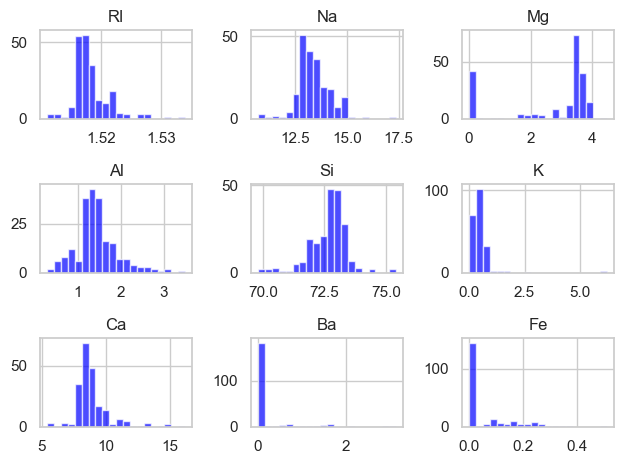

In [104]:
plt.figure(figsize=(12, 8))
data.drop(['Id number', 'Type of glass'], axis=1).hist(bins=20, color='blue', alpha=0.7)
plt.tight_layout()
plt.show()


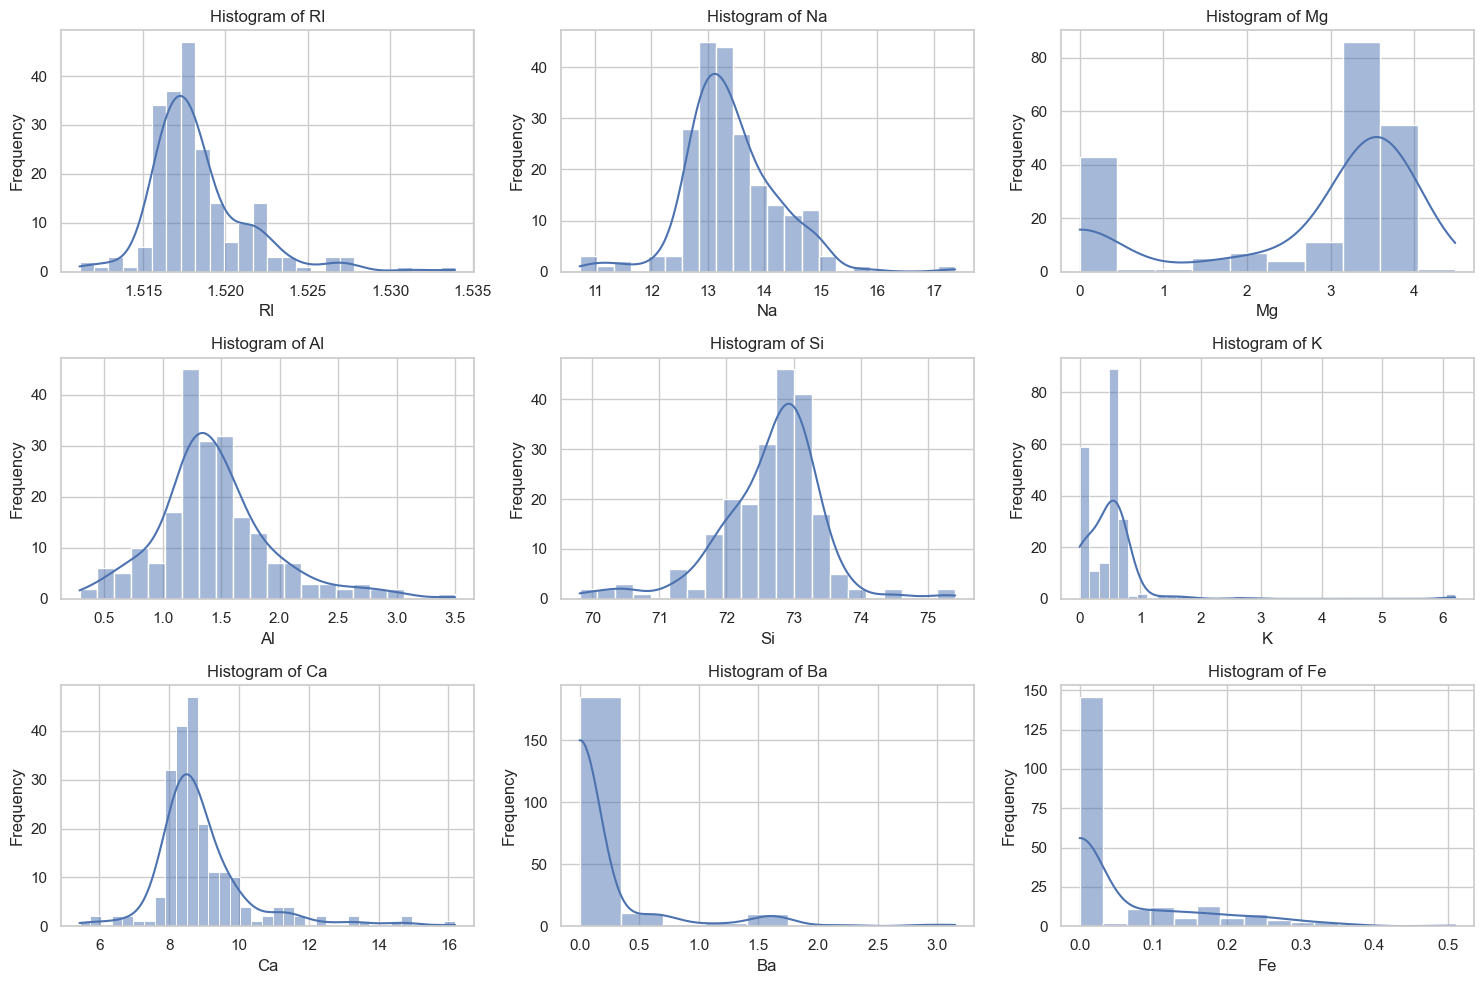

In [106]:
# Select columns for visualization (excluding Id number and Type of glass)
columns_to_visualize = data.columns[1:-1]

# Create individual histogram plots for each feature
plt.figure(figsize=(15, 10))
sns.set(style="whitegrid")
for column in columns_to_visualize:
    plt.subplot(3, 3, columns_to_visualize.get_loc(column) + 1)
    sns.histplot(data[column], kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

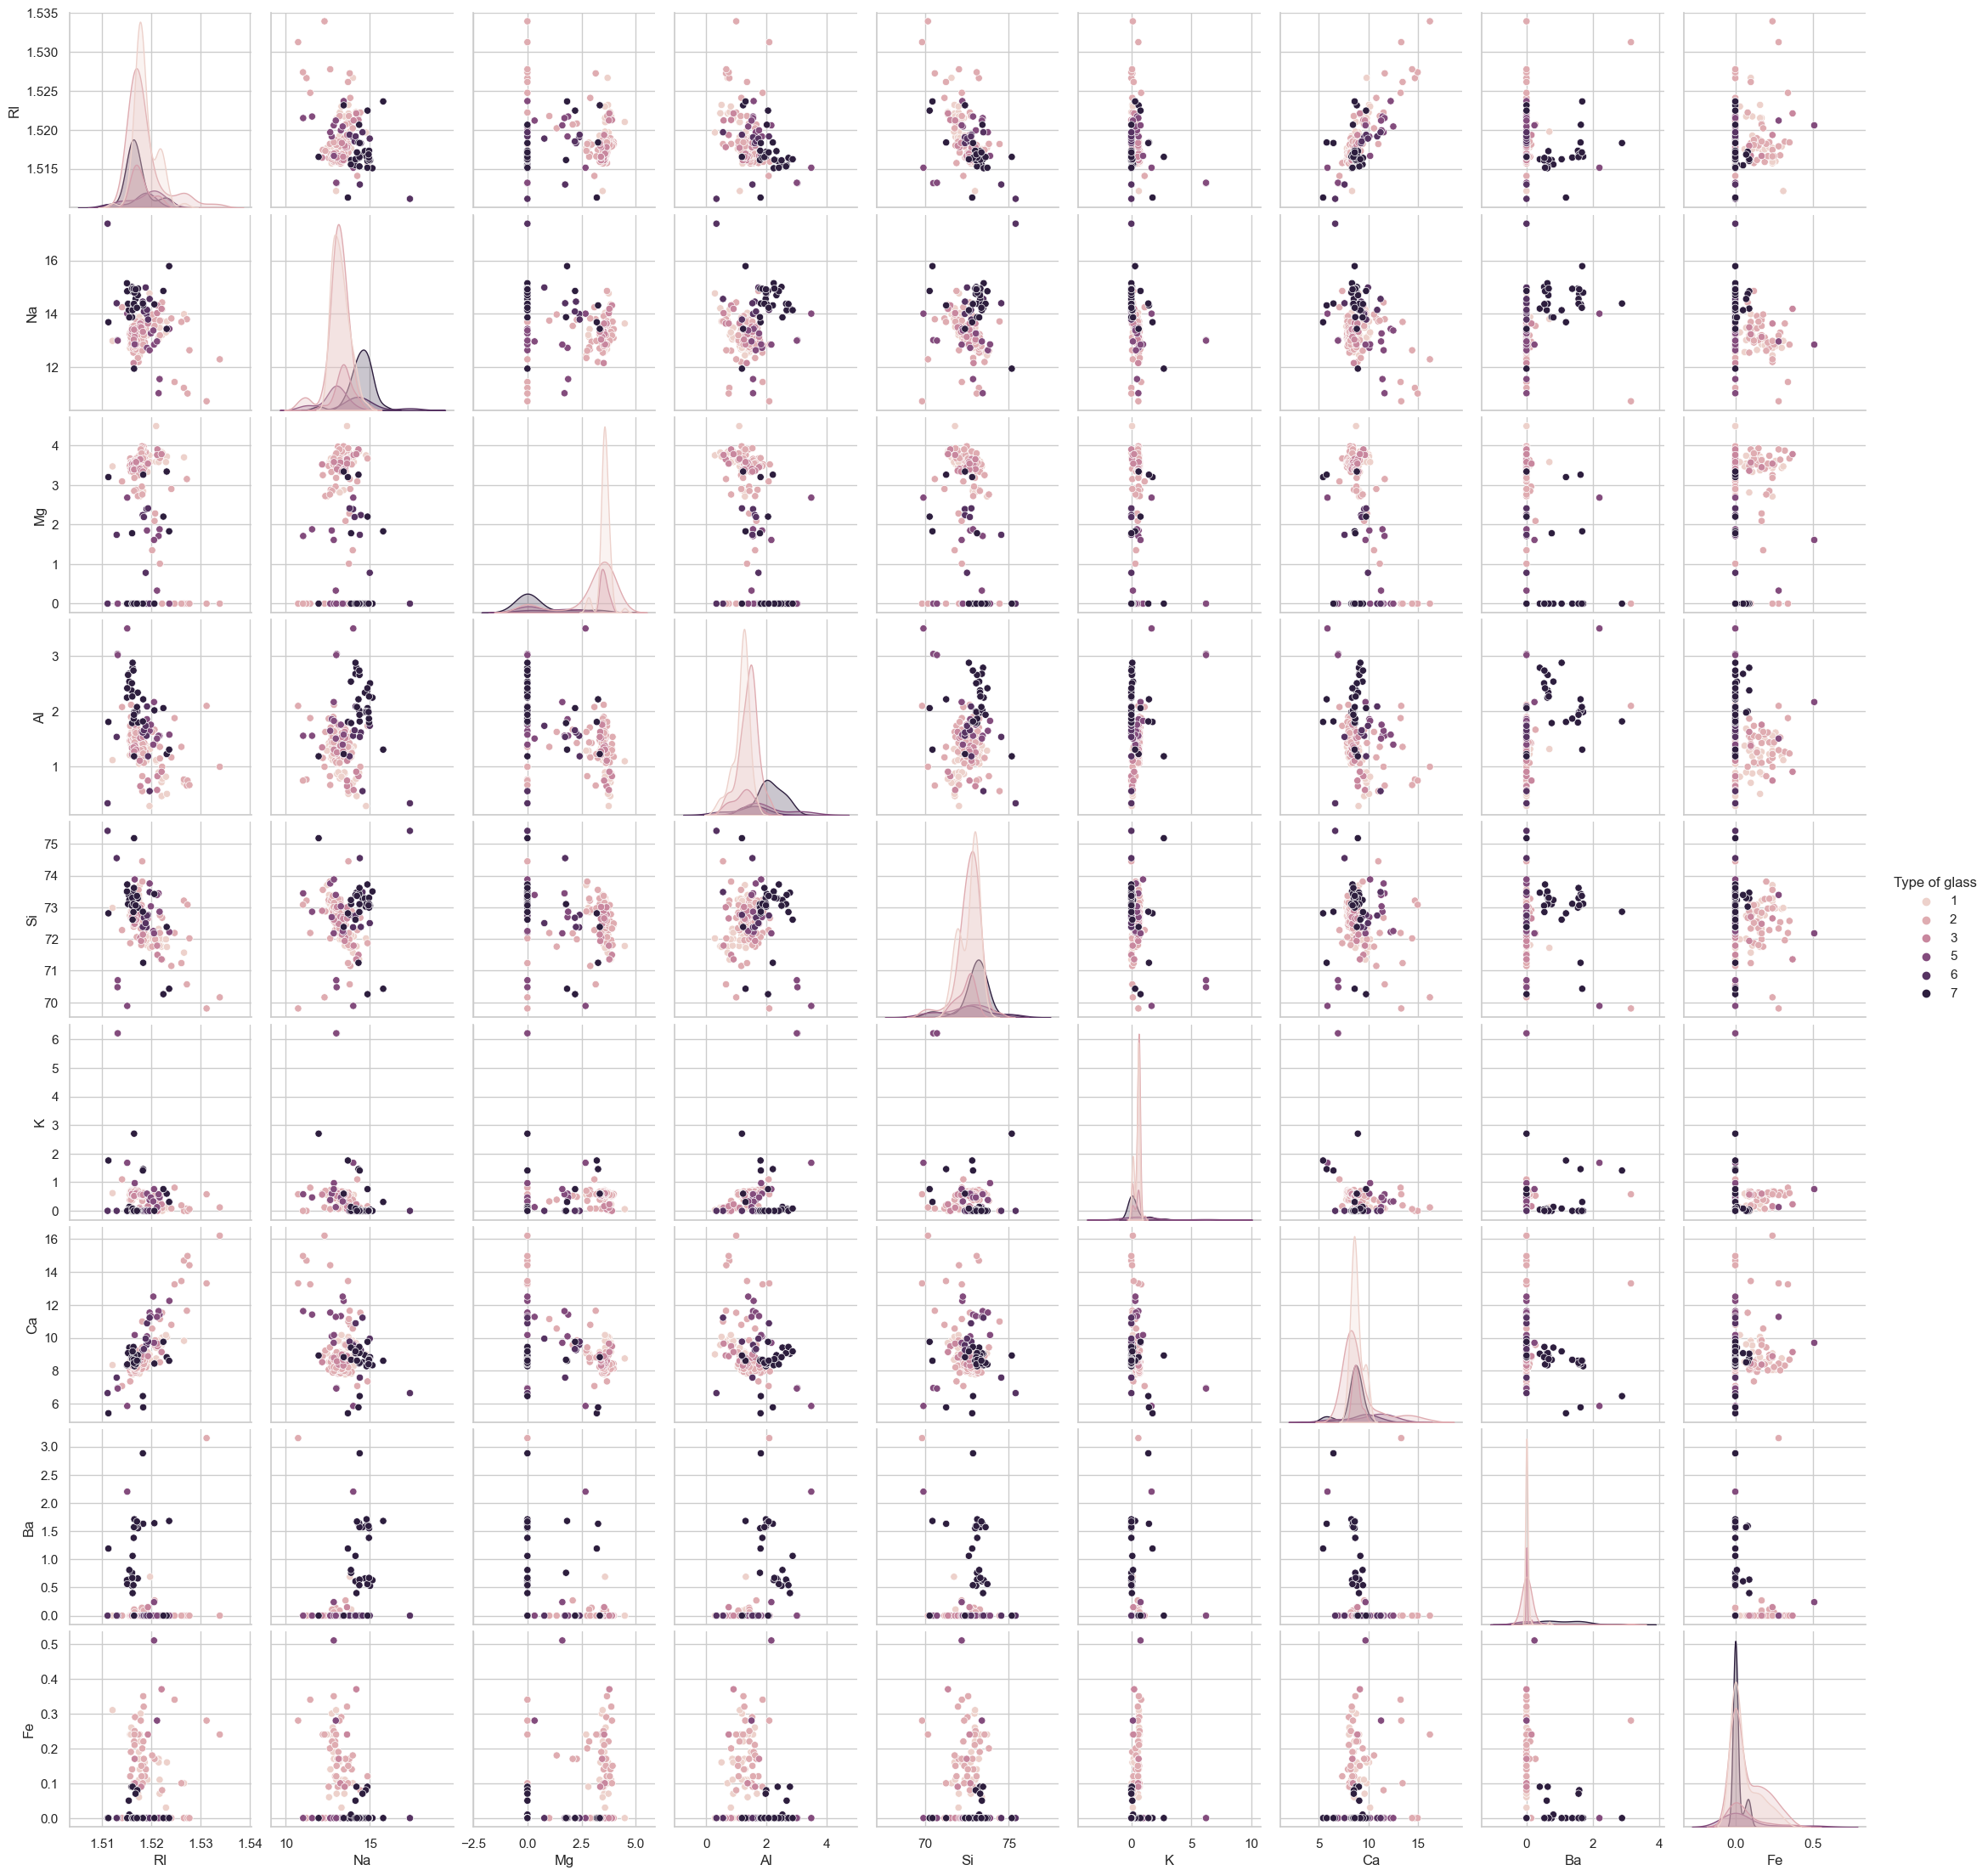

In [105]:
sns.pairplot(data.drop(['Id number'], axis=1), hue='Type of glass', diag_kind='kde')
plt.show()


### Handling Outliers 

In [164]:
# Make a copy of the dataset
winsorized_data = data.copy()

# Define the percentage of data to be capped (e.g., 5% on each end)
winsor_percent = 0.1

# Apply winsorization to each column except 'Id number' and 'Type of glass'
columns_to_winsorize = data.columns[1:-1]
for column in columns_to_winsorize:
    winsorized_data[column] = winsorize(winsorized_data[column], limits=(winsor_percent, winsor_percent))

print(winsorized_data.shape)
    
# Now the dataset 'data_copy' has Winsorized values while preserving the original data

(214, 11)


In [165]:
winsorized_data.head()

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1,1.52101,13.64,3.76,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.97,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.97,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


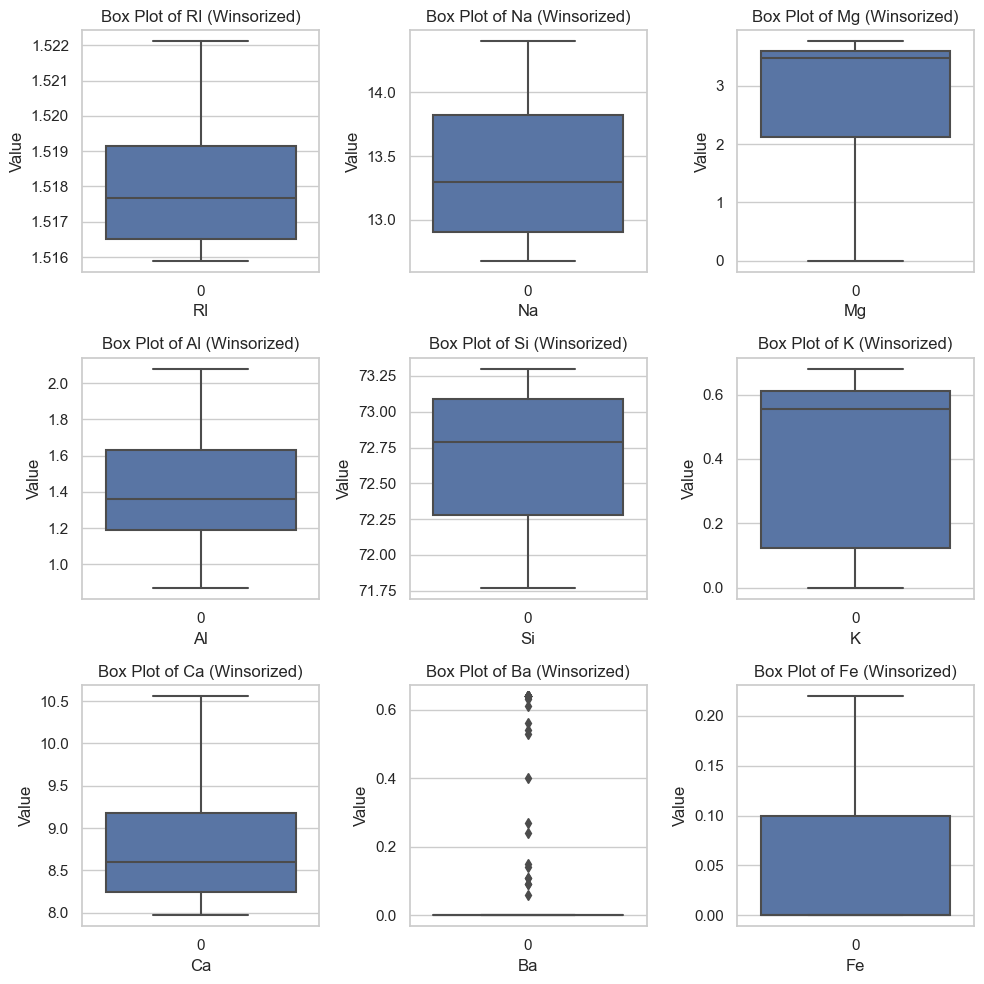

In [166]:
# Select columns for visualization (excluding 'Id number' and 'Type of glass')
columns_to_visualize = winsorized_data.columns[1:-1]

# Create individual box plots for each feature
plt.figure(figsize=(10, 10))
sns.set(style="whitegrid")
for column in columns_to_visualize:
    plt.subplot(3, 3, columns_to_visualize.get_loc(column) + 1)
    sns.boxplot(data=winsorized_data[column])
    plt.title(f'Box Plot of {column} (Winsorized)')
    plt.xlabel(column)
    plt.ylabel('Value')
plt.tight_layout()
plt.show()

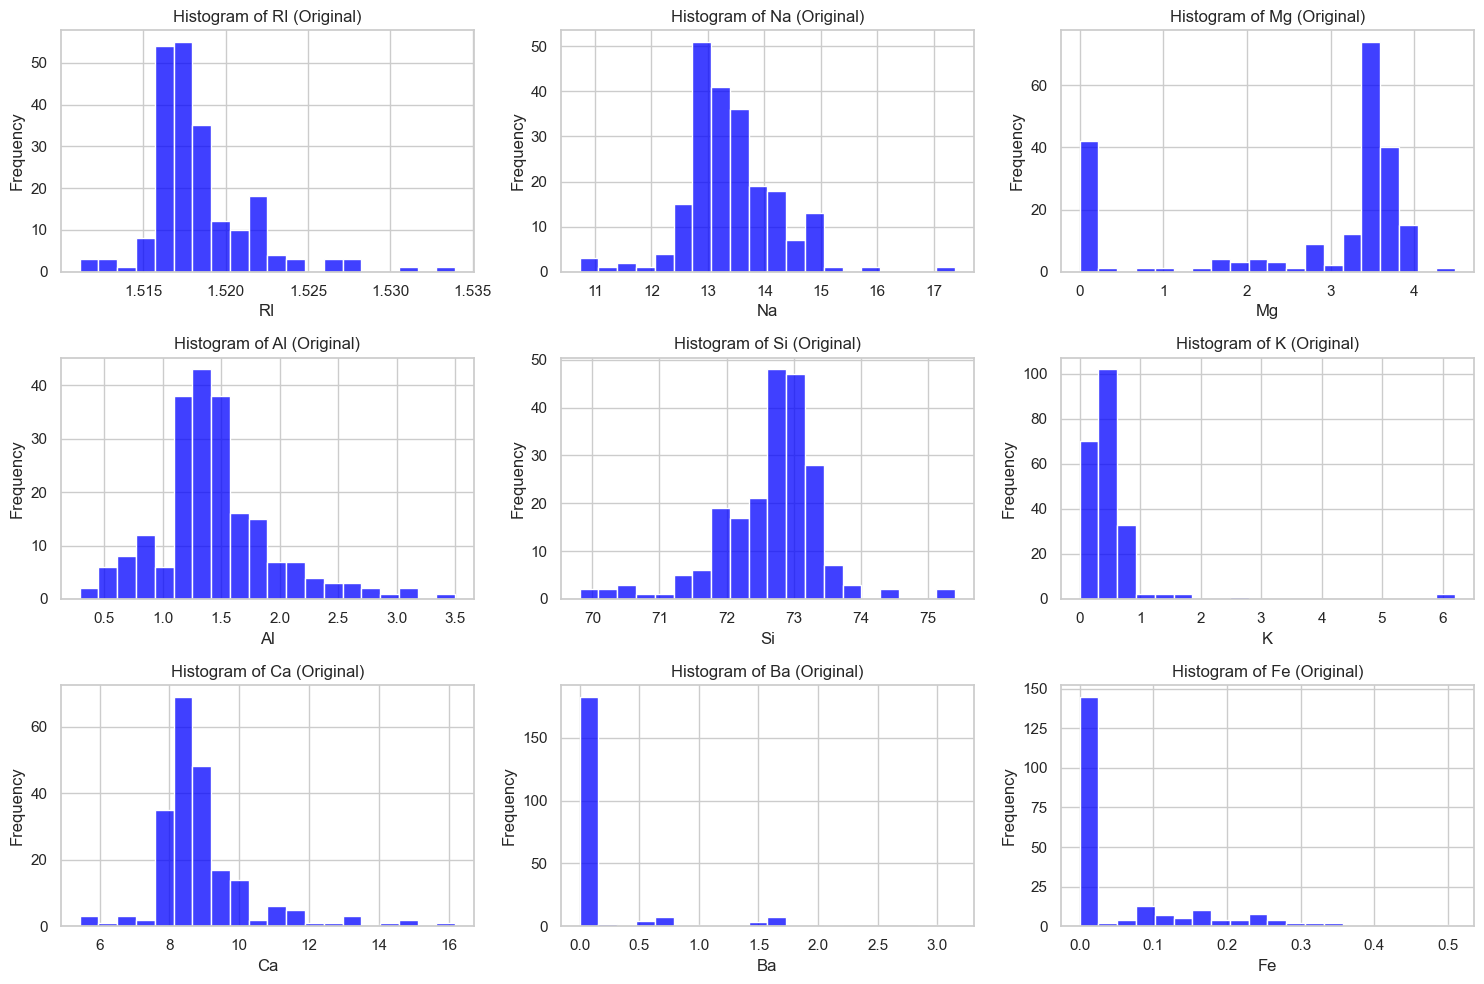

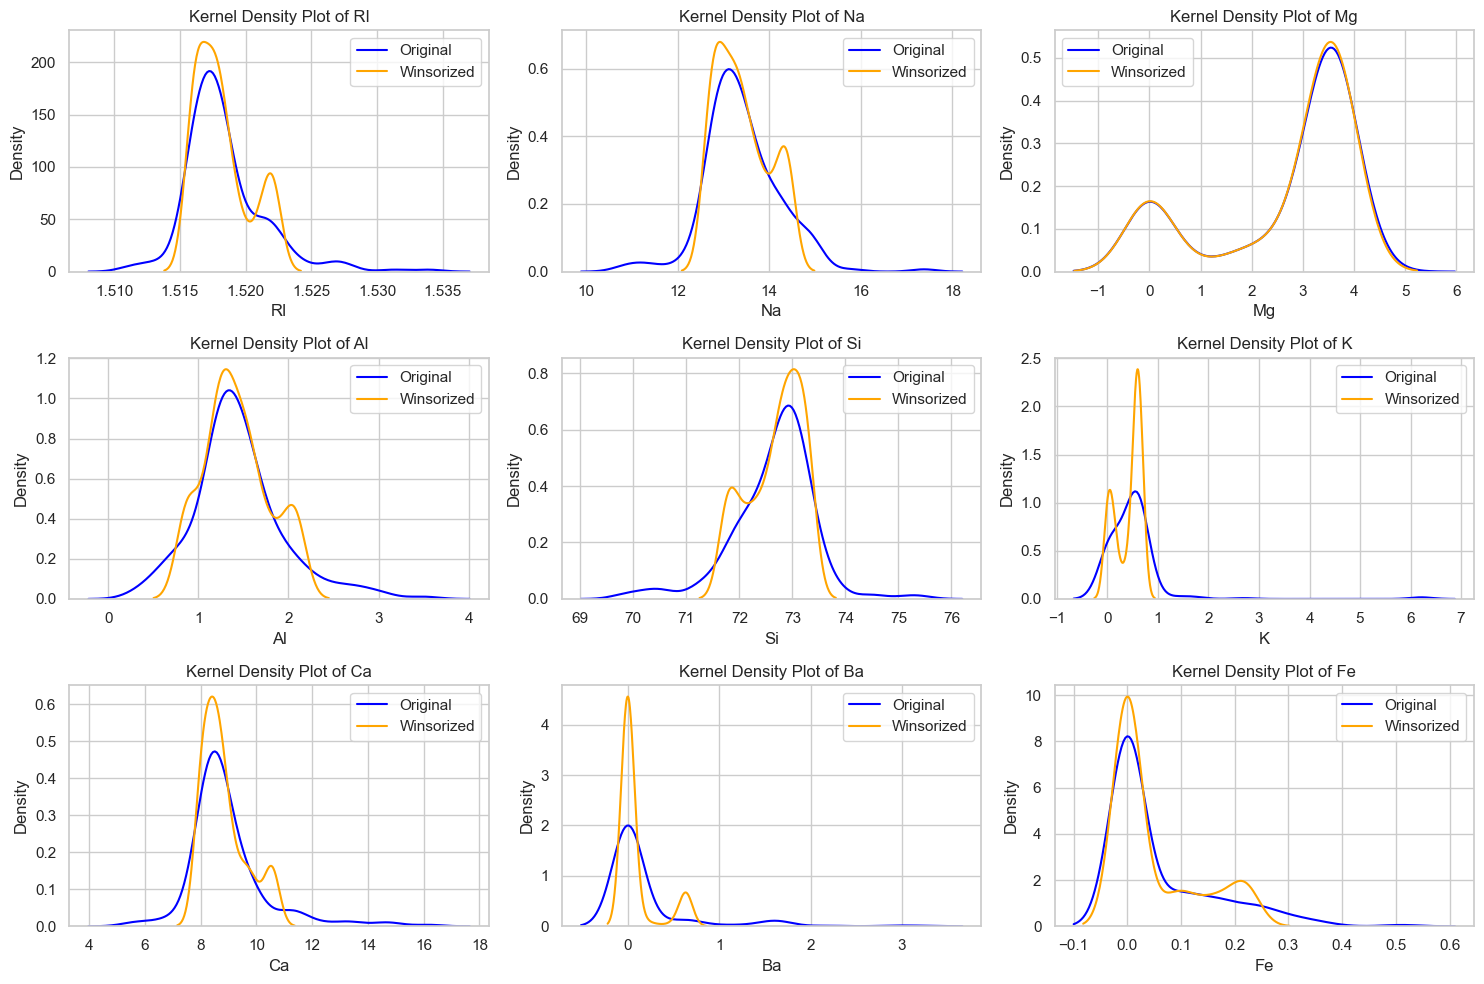

In [168]:
# Original data histograms
plt.figure(figsize=(15, 10))
for i, column in enumerate(data.columns[1:-1], 1):
    plt.subplot(3, 3, i)
    sns.histplot(data[column], bins=20, kde=False, color='blue')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column} (Original)')
plt.tight_layout()
plt.show()

# Kernel Density Plots
plt.figure(figsize=(15, 10))
for i, column in enumerate(data.columns[1:-1], 1):
    plt.subplot(3, 3, i)
    sns.kdeplot(data[column], color='blue', label='Original')
    sns.kdeplot(winsorized_data[column], color='orange', label='Winsorized')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.legend()
    plt.title(f'Kernel Density Plot of {column}')
plt.tight_layout()
plt.show()

# Feature Engineering / Selection

### Correlation Matrix (Triangle Heat Map)

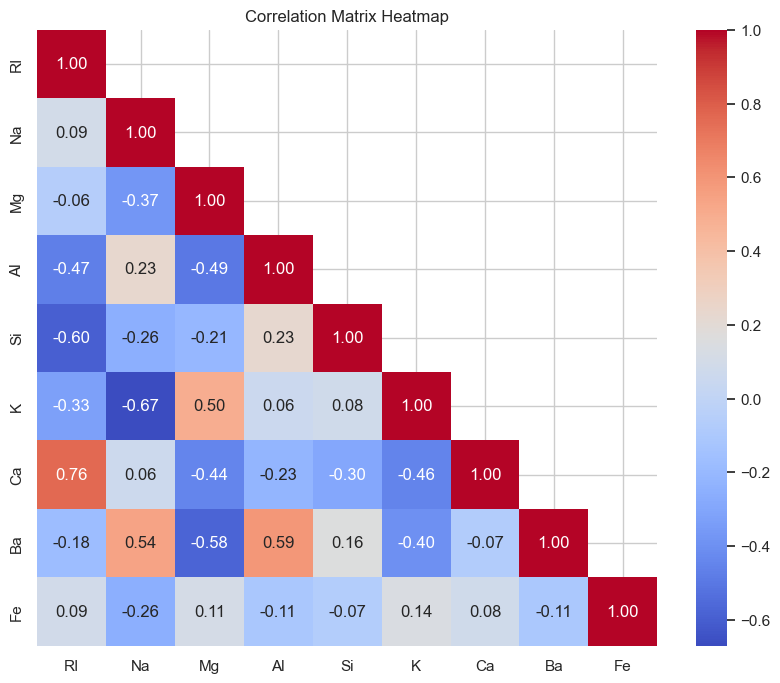

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
RI,1.000000,0.092991,-0.061718,-0.469978,-0.596507,-0.327021,0.758809,-0.181244,0.091459
Na,0.092991,1.000000,-0.374203,0.232014,-0.256480,-0.670747,0.063648,0.540969,-0.256104
Mg,-0.061718,-0.374203,1.000000,-0.494556,-0.207942,0.495710,-0.444828,-0.576203,0.109456
Al,-0.469978,0.232014,-0.494556,1.000000,0.225272,0.055576,-0.226698,0.593155,-0.113015
Si,-0.596507,-0.256480,-0.207942,0.225272,1.000000,0.082490,-0.296046,0.158768,-0.065871
K,-0.327021,-0.670747,0.495710,0.055576,0.082490,1.000000,-0.455301,-0.401351,0.143805
Ca,0.758809,0.063648,-0.444828,-0.226698,-0.296046,-0.455301,1.000000,-0.071161,0.080336
Ba,-0.181244,0.540969,-0.576203,0.593155,0.158768,-0.401351,-0.071161,1.000000,-0.109252
Fe,0.091459,-0.256104,0.109456,-0.113015,-0.065871,0.143805,0.080336,-0.109252,1.000000


In [169]:
# Calculate correlation matrix
correlation_matrix = winsorized_data.drop(columns=['Id number', 'Type of glass']).corr()

# Create a triangle heatmap
plt.figure(figsize=(10, 8))
mask = np.triu(np.ones(correlation_matrix.shape), k=1)
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", mask=mask)
plt.title("Correlation Matrix Heatmap")
plt.show()

correlation_matrix

From the correlation matrix:

* The refractive index (RI) has a strong positive correlation with calcium (Ca) and a moderate negative correlation with silicon (Si).
* Sodium (Na) has a weak negative correlation with refractive index (RI) and a weak positive correlation with barium (Ba).
* Magnesium (Mg) has a moderate negative correlation with aluminum (Al) and silicon (Si).
* Aluminum (Al) has a weak negative correlation with magnesium (Mg) and a moderate positive correlation with barium (Ba).
* Silicon (Si) has a moderate negative correlation with aluminum (Al) and a weak positive correlation with potassium (K).
* Potassium (K) has a weak negative correlation with silicon (Si).
* Calcium (Ca) has a strong positive correlation with refractive index (RI) and a weak negative correlation with magnesium (Mg).
* Barium (Ba) has a weak positive correlation with sodium (Na) and a moderate positive correlation with aluminum (Al).
* Iron (Fe) has a weak positive correlation with refractive index (RI) and a weak negative correlation with calcium (Ca).

# Class Balancing

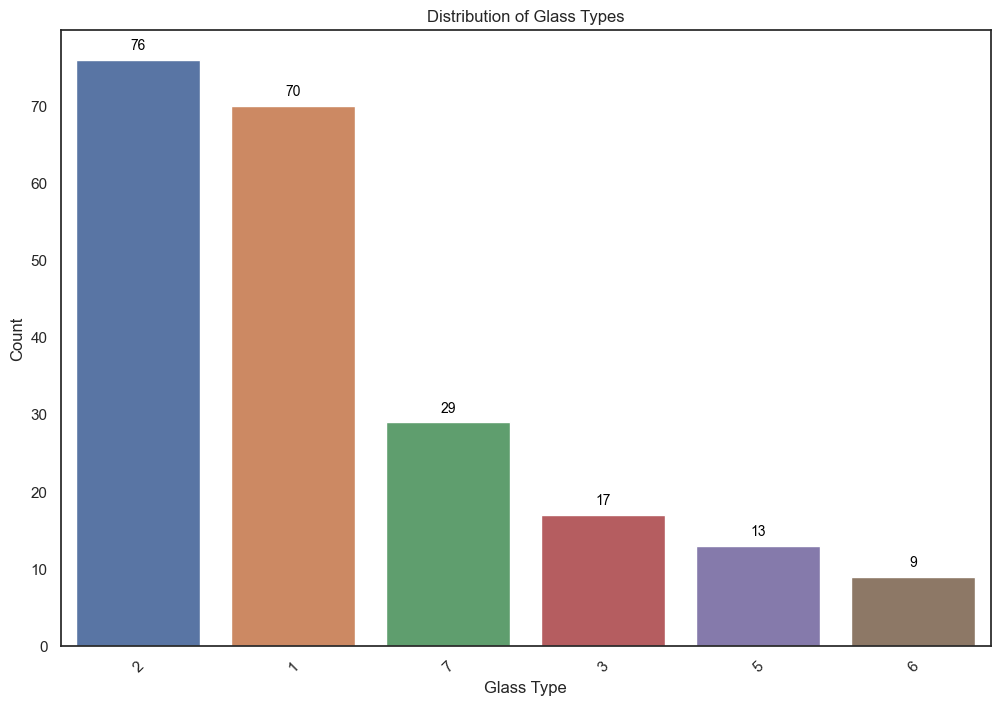

In [173]:
plt.figure(figsize=(12, 8))
sns.set(style="white")
sns.countplot(x='Type of glass', data=winsorized_data, order=winsorized_data['Type of glass'].value_counts().index)
plt.title('Distribution of Glass Types')
plt.xlabel('Glass Type')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Adding data labels
for p in plt.gca().patches:
    plt.gca().annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 10),
                textcoords='offset points')

plt.show()

In [174]:
# Print class counts
class_counts = winsorized_data['Type of glass'].value_counts()
class_counts

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type of glass, dtype: int64

In [175]:
unique_glass_types = winsorized_data['Type of glass'].unique()
print("Unique Glass Types:", unique_glass_types)


Unique Glass Types: [1 2 3 5 6 7]


### Handling Class Imbalance using  Random Over Sampler

In [176]:
# Split data into features (X) and target (y)
X = winsorized_data.drop(columns=['Id number', 'Type of glass'])
y = winsorized_data['Type of glass']

# Instantiate the RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Fit and apply the resampling
X_resampled, y_resampled = ros.fit_resample(X, y)

# Split resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Print the class distribution before and after oversampling
print("Class distribution before oversampling:")
print(pd.Series(y).value_counts())
print("\nClass distribution after oversampling:")
print(pd.Series(y_resampled).value_counts())

Class distribution before oversampling:
2    76
1    70
7    29
3    17
5    13
6     9
Name: Type of glass, dtype: int64

Class distribution after oversampling:
1    76
2    76
3    76
5    76
6    76
7    76
Name: Type of glass, dtype: int64


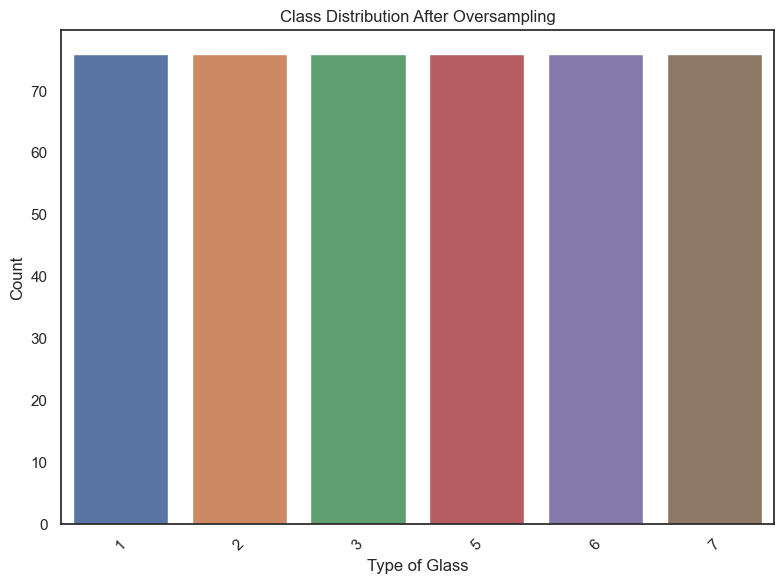

In [177]:
# Create a DataFrame for the resampled target
df_resampled = pd.DataFrame({'Type of glass': y_resampled})

# Plot the distribution of classes after oversampling
plt.figure(figsize=(8, 6))
sns.countplot(data=df_resampled, x='Type of glass')
plt.title('Class Distribution After Oversampling')
plt.xlabel('Type of Glass')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Feature Selection Using Recursive Feature Elimination (RFE)

In [187]:
# Split data into features (X) and target (y)
X = winsorized_data.drop(columns=['Id number', 'Type of glass'])
y = winsorized_data['Type of glass']

# Scale the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split scaled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Instantiate the model you want to use for RFE
model = LogisticRegression(max_iter=1000)

# Instantiate the RFE selector
rfe_selector = RFE(model, n_features_to_select=7)  # Select top 5 features

# Fit RFE selector to the training data
rfe_selector.fit(X_train, y_train)

# Get the selected features
selected_features = X.columns[rfe_selector.support_]

print("Selected Features:")
print(selected_features)

Selected Features:
Index(['RI', 'Na', 'Mg', 'Al', 'K', 'Ca', 'Fe'], dtype='object')


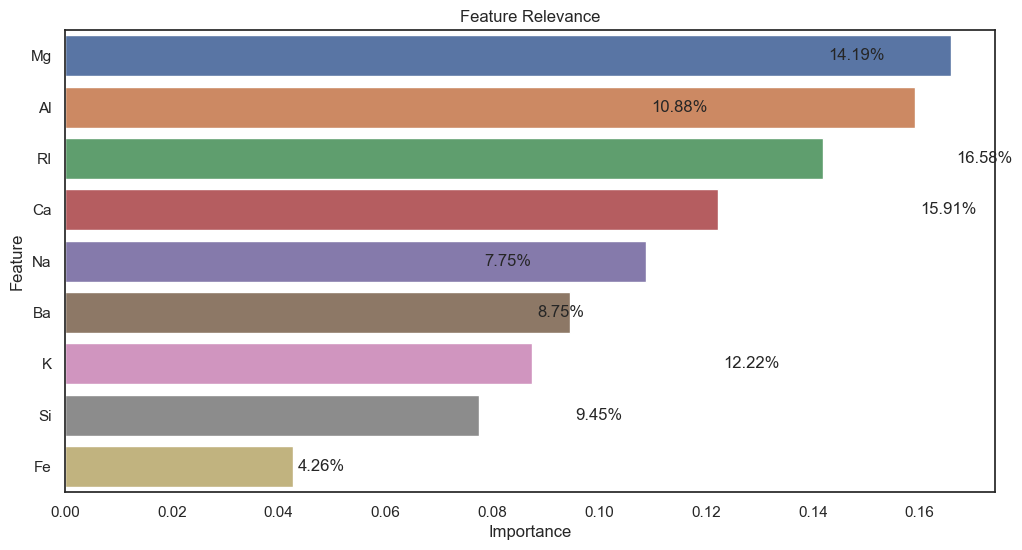

,Feature,Importance
2,Mg,0.165785
3,Al,0.159117
0,RI,0.141939
6,Ca,0.122225
1,Na,0.108803
7,Ba,0.094503
5,K,0.087508
4,Si,0.077472
8,Fe,0.042649


In [207]:
# Instantiate a Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)

# Fit the model on the entire dataset
rf_model.fit(X_scaled, y)

# Get feature importances from the model
feature_importances = rf_model.feature_importances_

# Create a DataFrame with feature names and their importances
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Create a bar plot to visualize feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Relevance')
plt.xlabel('Importance')
plt.ylabel('Feature')

# Add data labels in percentage format at the end of the bars
total = sum(feature_importances)
for index, row in importance_df.iterrows():
    plt.text(row['Importance'] + 0.001, index, f'{row["Importance"]:.2%}', ha='left', va='center')

plt.show()

importance_df


# Glass Classification Model Building, Evaluation and Comparison

In [227]:
# Scale features using standard scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [228]:
models = {
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000, class_weight="balanced"),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Support Vector Machine": SVC(random_state=42, max_iter=1000, class_weight="balanced"),
    "MLP Classifier": MLPClassifier(random_state=42, max_iter=1000)
}

In [263]:
results = []

# Loop through each model in the 'models' dictionary
for model_name, model in models.items():
    print(f" \033[1mTRAINING {model_name.upper()}...\033[0m \n")
    
    # Train the model on the scaled training data
    model.fit(X_train_scaled, y_train)
    
    # Predict using the trained model on the scaled test data
    y_pred = model.predict(X_test_scaled)
    
    # Calculate accuracy and generate classification report
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    # Generate confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Print accuracy and classification report
    print(f"{model_name} Accuracy: {accuracy:.2f}")
    print(f"Classification Report:\n{report}\n{'='*40}\n")
    
    # Store results in a list
    results.append({
        "Model": model_name,
        "Accuracy": accuracy,
        "Classification Report": report,
        "Confusion Matrix": conf_matrix
    })

# Create a DataFrame from the results list
results_df = pd.DataFrame(results)


 TRAINING LOGISTIC REGRESSION... 

Logistic Regression Accuracy: 0.77
Classification Report:
              precision    recall  f1-score   support

           1       0.80      0.73      0.76        11
           2       0.80      0.57      0.67        14
           3       0.38      1.00      0.55         3
           5       0.75      0.75      0.75         4
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         8

    accuracy                           0.77        43
   macro avg       0.79      0.84      0.79        43
weighted avg       0.82      0.77      0.78        43


 TRAINING DECISION TREE... 

Decision Tree Accuracy: 0.74
Classification Report:
              precision    recall  f1-score   support

           1       0.67      0.55      0.60        11
           2       0.67      0.71      0.69        14
           3       0.60      1.00      0.75         3
           5       1.00      0.75      0.86         4
           

C:\Users\JOBA\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


**Logistic Regression:**

* The Logistic Regression model achieved an accuracy of 77%. In terms of precision, it performed well in predicting classes 1, 2, 6, and 7, but struggled with class 3. The model had high recall for class 3, indicating it correctly identified all instances of that class, while classes 1, 2, and 5 showed mixed recall values. Overall, the model's performance on the F1-score was balanced, with higher scores for classes 6 and 7.

**Decision Tree:**

* The Decision Tree model achieved an accuracy of 74%. While its precision was decent across most classes, it showed challenges in predicting class 3. The model achieved high recall for class 3, indicating it identified all instances of that class, and achieved perfect recall for classes 6 and 7. The F1-score showed relatively balanced performance across most classes, with slightly higher scores for classes 6 and 7.

**Random Forest:**

* The Random Forest model outperformed others with an accuracy of 86%. It demonstrated good precision and recall for most classes, although it had challenges in predicting class 3. The model showed high precision and recall for classes 1, 2, 6, and 7. The F1-score was generally balanced, with the highest scores for classes 1, 2, and 6.

**Support Vector Machine:**

* The Support Vector Machine model achieved an accuracy of 77%. It exhibited mixed precision values across classes, with better precision for classes 1, 2, and 7. The model had decent recall for most classes, but struggled with class 3. The F1-score indicated balanced performance, with slightly higher scores for classes 6 and 7.

**MLP Classifier:**

* The MLP Classifier achieved an accuracy of 81%. It demonstrated good precision and recall for classes 1, 2, and 7, but struggled with class 3 in terms of precision. The model achieved high recall for class 1, indicating it correctly identified most instances of that class. The F1-score showed balanced performance, with higher scores for classes 1, 2, and 7.

**In summary, the Random Forest model had the highest accuracy among the tested models, effectively balancing precision and recall for most classes. The Decision Tree model performed relatively well, while the other models exhibited strengths and challenges in different aspects of classification.**

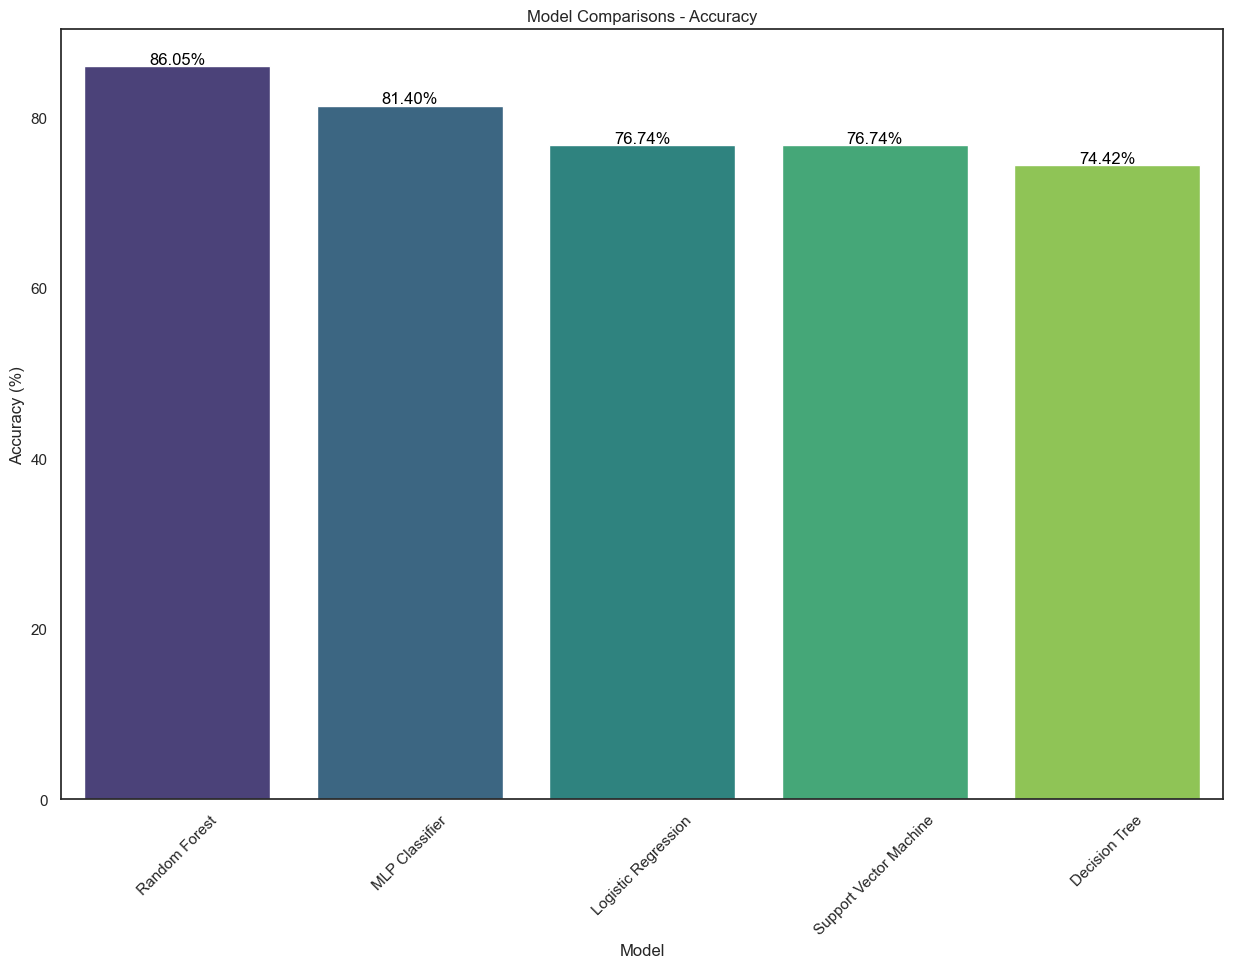

In [287]:
# Convert accuracy to percentage
results_df['Accuracy'] = results_df['Accuracy'] * 100

# Sort the DataFrame by Accuracy in descending order
results_df = results_df.sort_values(by='Accuracy', ascending=False)

# Visualize model comparisons
plt.figure(figsize=(15, 10))
ax = sns.barplot(x='Model', y='Accuracy', data=results_df, palette='viridis')
plt.title('Model Comparisons - Accuracy')
plt.xticks(rotation=45)
plt.ylabel('Accuracy (%)')

# Add accuracy labels (in percentage) on each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()


Confusion Matrix - Logistic Regression:
[[8 1 2 0 0 0]
 [2 8 3 1 0 0]
 [0 0 3 0 0 0]
 [0 1 0 3 0 0]
 [0 0 0 0 3 0]
 [0 0 0 0 0 8]]


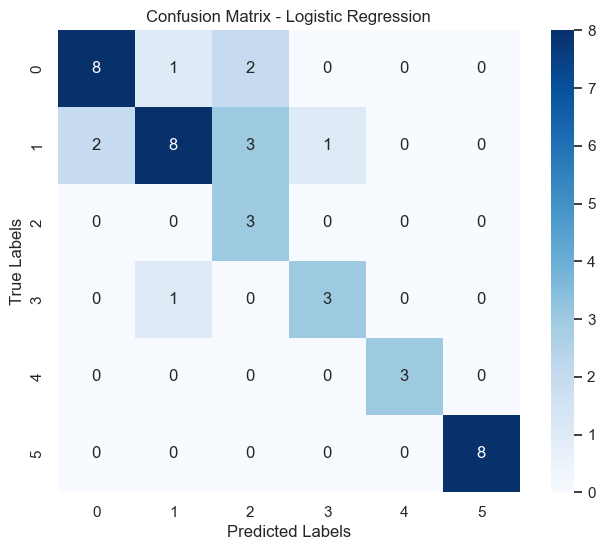

Confusion Matrix - Decision Tree:
[[ 6  3  1  0  0  1]
 [ 3 10  1  0  0  0]
 [ 0  0  3  0  0  0]
 [ 0  1  0  3  0  0]
 [ 0  1  0  0  2  0]
 [ 0  0  0  0  0  8]]


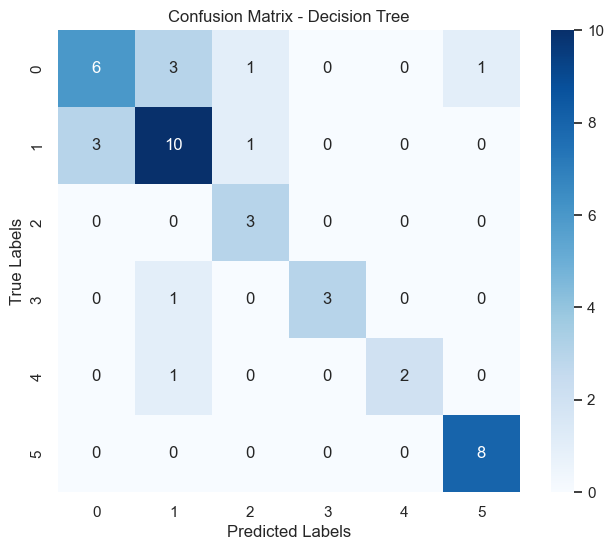

Confusion Matrix - Random Forest:
[[11  0  0  0  0  0]
 [ 3 10  0  0  0  1]
 [ 1  0  2  0  0  0]
 [ 0  1  0  3  0  0]
 [ 0  0  0  0  3  0]
 [ 0  0  0  0  0  8]]


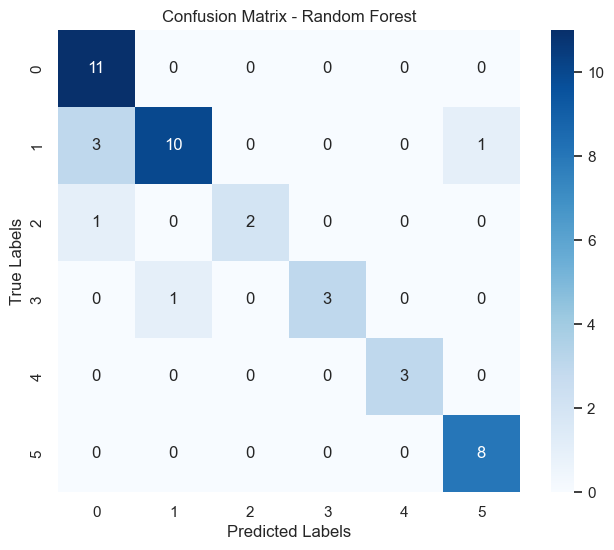

Confusion Matrix - Support Vector Machine:
[[8 0 3 0 0 0]
 [4 9 1 0 0 0]
 [0 1 2 0 0 0]
 [0 1 0 3 0 0]
 [0 0 0 0 3 0]
 [0 0 0 0 0 8]]


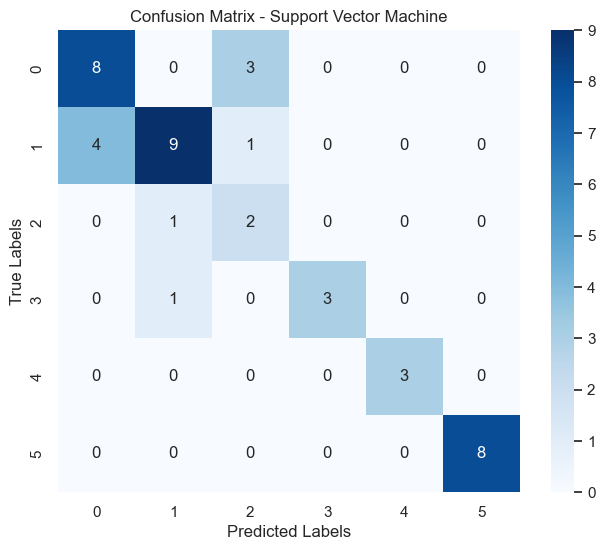

Confusion Matrix - MLP Classifier:
[[10  0  1  0  0  0]
 [ 2 10  1  0  0  1]
 [ 1  0  2  0  0  0]
 [ 0  1  0  3  0  0]
 [ 0  0  0  1  2  0]
 [ 0  0  0  0  0  8]]


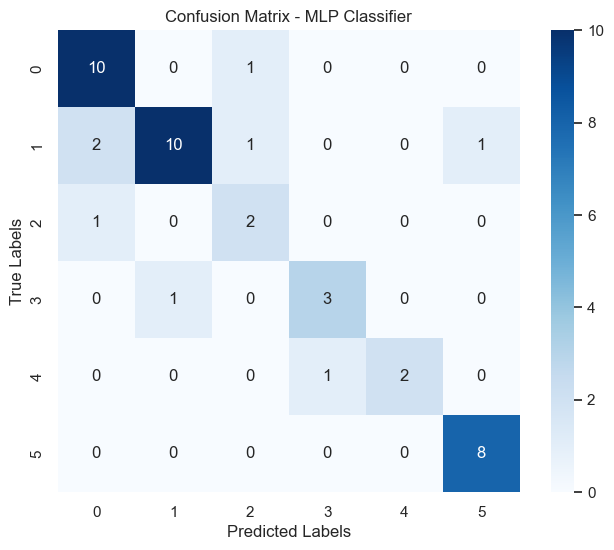

In [264]:
# Plot the confusion matrix for each model
# Loop through each model's results in the results DataFrame
for index, row in results_df.iterrows():
    model_name = row['Model']  # Get the model name
    conf_matrix = row['Confusion Matrix']  # Get the confusion matrix
    
    # Print the confusion matrix for the current model
    print(f"\033[1mConfusion Matrix - {model_name}:\033[0m")
    print(conf_matrix)
    
    # Create a heatmap for the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', square=True)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()


**Confusion Matrix - Logistic Regression:**

* The model correctly predicted 8 instances of Class 1, while misclassifying 1 instance as Class 2 and 2 instances as Class 3.
* For Class 2, the model correctly predicted 8 instances, misclassifying 2 instances as Class 1, 3 instances as Class 3, and 1 instance as Class 4.
* The model correctly predicted 3 instances of Class 3, with no misclassifications.
* For Class 4, the model correctly predicted 3 instances, misclassifying 1 instance as Class 2.
* For Class 5, the model correctly predicted 3 instances, with no misclassifications.
* For Class 6, the model correctly predicted 8 instances, with no misclassifications.

**Confusion Matrix - Decision Tree:**

* The model correctly predicted 6 instances of Class 1, misclassifying 3 instances as Class 2, 1 instance as Class 3, and 1 instance as Class 6.
* For Class 2, the model correctly predicted 10 instances, misclassifying 3 instances as Class 1 and 1 instance as Class 3.
* The model correctly predicted 3 instances of Class 3, with no misclassifications.
* For Class 4, the model correctly predicted 3 instances, misclassifying 1 instance as Class 2.
* For Class 5, the model correctly predicted 2 instances, misclassifying 1 instance as Class 2.
* For Class 6, the model correctly predicted 8 instances, with no misclassifications.

**Confusion Matrix - Random Forest:**

* The model correctly predicted 11 instances of Class 1, with no misclassifications.
* For Class 2, the model correctly predicted 10 instances, misclassifying 3 instances as Class 1 and 1 instance as Class 6.
* The model correctly predicted 2 instances of Class 3, misclassifying 1 instance as Class 1.
* For Class 4, the model correctly predicted 3 instances, misclassifying 1 instance as Class 2.
* For Class 5, the model correctly predicted 3 instances, with no misclassifications.
* For Class 6, the model correctly predicted 8 instances, with no misclassifications.

**Confusion Matrix - Support Vector Machine:**

* The model correctly predicted 8 instances of Class 1, misclassifying 3 instances as Class 3.
* For Class 2, the model correctly predicted 9 instances, misclassifying 4 instances as Class 1 and 1 instance as Class 3.
* The model correctly predicted 2 instances of Class 3, misclassifying 1 instance as Class 2.
* For Class 4, the model correctly predicted 3 instances, misclassifying 1 instance as Class 2.
* For Class 5, the model correctly predicted 3 instances, with no misclassifications.
* For Class 6, the model correctly predicted 8 instances, with no misclassifications.

**Confusion Matrix - MLP Classifier:**

* The model correctly predicted 10 instances of Class 1, misclassifying 1 instance as Class 3.
* For Class 2, the model correctly predicted 10 instances, misclassifying 2 instances as Class 1 and 1 instance as Class 3.
* The model correctly predicted 2 instances of Class 3, misclassifying 1 instance as Class 1.
* For Class 4, the model correctly predicted 3 instances, misclassifying 1 instance as Class 2.
* For Class 5, the model correctly predicted 2 instances, misclassifying 1 instance as Class 4.
* For Class 6, the model correctly predicted 8 instances, with no misclassifications.

These confusion matrices provide a detailed overview of how each model's predictions align with the true labels for each class. They show the number of instances correctly predicted in the diagonal and the instances that were misclassified off-diagonal.

# Hyperparameter Tuning

In [288]:
# Define the hyperparameter grids for each model
param_grids = {
    'Logistic Regression': {
        'C': [0.1, 1, 10],
        'max_iter': [100, 200, 300]
    },
    'Decision Tree': {
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'Random Forest': {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'Support Vector Machine': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf', 'poly']
    },
    'MLP Classifier': {
        'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
        'max_iter': [100, 200, 300]
    }
}

Performing Hyperparameter Tuning for Logistic Regression...
 ***************** Logistic Regression *****************
Accuracy: 0.7209302325581395
Precision (macro): 0.7343915343915345
Recall (macro): 0.7739898989898991
F1-Score (macro): 0.7210259949390384
Confusion Matrix:
[[8 1 2 0 0 0]
 [2 7 2 2 0 1]
 [0 0 3 0 0 0]
 [0 1 0 3 0 0]
 [0 0 0 0 2 1]
 [0 0 0 0 0 8]]


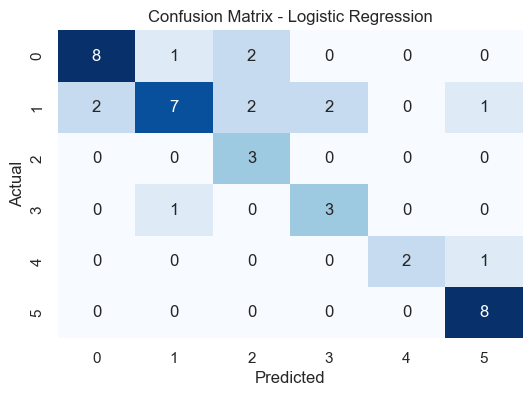


Performing Hyperparameter Tuning for Decision Tree...
 ***************** Decision Tree *****************
Accuracy: 0.7441860465116279
Precision (macro): 0.8037037037037037
Recall (macro): 0.7794011544011544
F1-Score (macro): 0.7729957500241476
Confusion Matrix:
[[ 6  3  1  0  0  1]
 [ 3 10  1  0  0  0]
 [ 0  0  3  0  0  0]
 [ 0  1  0  3  0  0]
 [ 0  1  0  0  2  0]
 [ 0  0  0  0  0  8]]


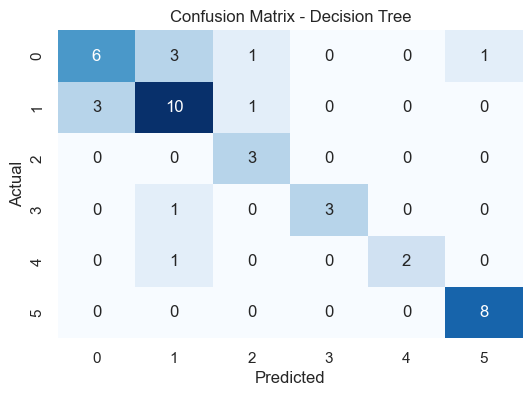


Performing Hyperparameter Tuning for Random Forest...
 ***************** Random Forest *****************
Accuracy: 0.8372093023255814
Precision (macro): 0.9198412698412698
Recall (macro): 0.7698412698412698
F1-Score (macro): 0.7997557997557997
Confusion Matrix:
[[11  0  0  0  0  0]
 [ 3 11  0  0  0  0]
 [ 1  1  1  0  0  0]
 [ 0  2  0  2  0  0]
 [ 0  0  0  0  3  0]
 [ 0  0  0  0  0  8]]


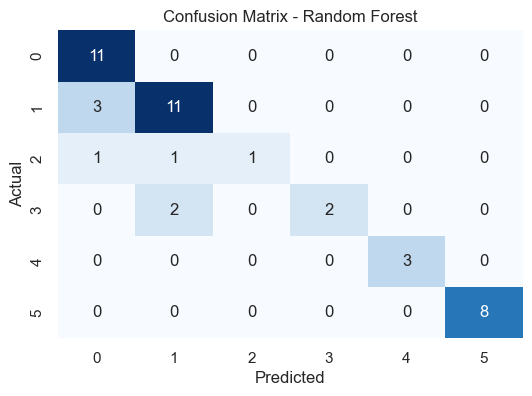


Performing Hyperparameter Tuning for Support Vector Machine...


C:\Users\JOBA\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\JOBA\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\JOBA\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\JOBA\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\JOBA\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).

 ***************** Support Vector Machine *****************
Accuracy: 0.8837209302325582
Precision (macro): 0.8916666666666666
Recall (macro): 0.9074675324675324
F1-Score (macro): 0.8871436534480012
Confusion Matrix:
[[10  0  1  0  0  0]
 [ 2 11  1  0  0  0]
 [ 0  0  3  0  0  0]
 [ 0  1  0  3  0  0]
 [ 0  0  0  0  3  0]
 [ 0  0  0  0  0  8]]


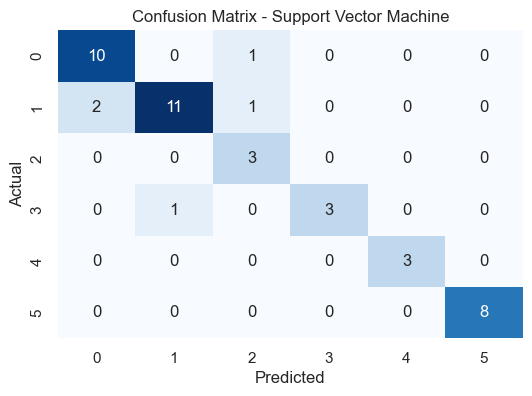


Performing Hyperparameter Tuning for MLP Classifier...


C:\Users\JOBA\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\JOBA\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\JOBA\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\JOBA\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\JOBA\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer

 ***************** MLP Classifier *****************
Accuracy: 0.8837209302325582
Precision (macro): 0.8948412698412698
Recall (macro): 0.8670634920634921
F1-Score (macro): 0.8749938949938949
Confusion Matrix:
[[11  0  0  0  0  0]
 [ 2 11  1  0  0  0]
 [ 1  0  2  0  0  0]
 [ 0  1  0  3  0  0]
 [ 0  0  0  0  3  0]
 [ 0  0  0  0  0  8]]


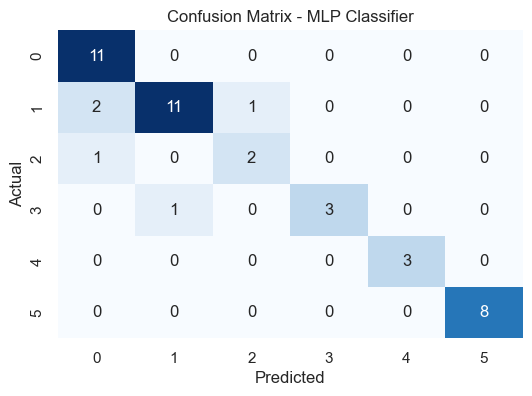

In [294]:
# Performing Hyperparameter Tuning for each model
for model_name, model in models.items():
    print(f"Performing Hyperparameter Tuning for {model_name}...")
    
    # Get the corresponding parameter grid for the model
    param_grid = param_grids[model_name]
    
    # Create the GridSearchCV object
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
    
    # Fit the grid search to the data
    grid_search.fit(X_train_scaled, y_train)
    
    # Get best parameters
    best_params = grid_search.best_params_
    
    # Create model with best parameters
    tuned_model = model.set_params(**best_params)
    
    # Train tuned model
    tuned_model.fit(X_train_scaled, y_train)
    
    # Make predictions
    preds = tuned_model.predict(X_test_scaled)
    
    # Evaluate and print results
    print(f" \033[1m" + "*****************", model_name, "*****************" + "\033[0m")
    print("Accuracy:", accuracy_score(y_test, preds))
    print("Precision (macro):", precision_score(y_test, preds, average='macro'))
    print("Recall (macro):", recall_score(y_test, preds, average='macro'))
    print("F1-Score (macro):", f1_score(y_test, preds, average='macro'))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, preds)
    print("Confusion Matrix:")
    print(cm)
    
    # Plot Confusion Matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    print()


**Logistic Regression:**
* After hyperparameter tuning, the Logistic Regression model's accuracy remained relatively stable at around 72%, which is slightly lower than the initial accuracy of 77%. The tuning had a limited impact on precision, recall, and the F1-score, with minor changes observed in these metrics. This suggests that the default hyperparameters were already providing reasonable performance, and further tuning did not lead to significant improvements.

**Decision Tree:**
* The Decision Tree model's accuracy also remained quite consistent after tuning, at approximately 74%, which was similar to the initial accuracy. The precision, recall, and F1-score metrics showed minor changes. This indicates that hyperparameter tuning did not result in substantial enhancements for this model either, suggesting that the default parameters were already providing a reasonable fit to the data.

**Random Forest:**
* Hyperparameter tuning yielded positive results for the Random Forest model. The accuracy experienced a slight decrease, moving from 86% to 83.7%. Despite this, precision, recall, and the F1-score metrics exhibited improvements. This suggests that the parameter optimization successfully identified settings that enhanced the model's ability to accurately classify instances.

**Support Vector Machine:**
* The Support Vector Machine (SVM) model experienced a notable improvement in accuracy after hyperparameter tuning, rising from 77% to 88.4%. This improvement was also reflected in precision, recall, and the F1-score, all of which showed positive changes. The tuning process likely found parameter values that better separated the classes in the feature space, leading to enhanced predictive performance.

**MLP Classifier:**
* Similar to the SVM model, the MLP Classifier's accuracy improved significantly after hyperparameter tuning, from 81% to 88.4%. This improvement was reflected in precision, recall, and the F1-score as well. The tuning process likely identified optimal configurations that allowed the neural network to capture more intricate patterns in the data, resulting in improved classification accuracy.

**In summary, the influence of hyperparameter tuning exhibited variability among the models. While tuning had minimal impact on models like Logistic Regression and Decision Tree, others such as Random Forest, Support Vector Machine, and MLP Classifier experienced substantial accuracy and performance enhancements. This underscores the importance of meticulous parameter tuning, particularly for models that can discern complex relationships within the data.**

# Key Findings

1. **Model Performance Variation:** The initial evaluation of various machine learning models revealed diverse performance levels. Models like Random Forest, Support Vector Machine, and MLP Classifier exhibited higher accuracy and better overall performance compared to Logistic Regression and Decision Tree.

2. **Hyperparameter Tuning Impact:** The impact of hyperparameter tuning varied across models. While Logistic Regression and Decision Tree showed limited improvement in performance metrics, Random Forest, Support Vector Machine, and MLP Classifier demonstrated notable enhancements in accuracy, precision, recall, and the F1-score after tuning.

3. **Random Forest Enhancement:** Hyperparameter tuning led to a marginal reduction in accuracy for the Random Forest model. However, improvements in precision, recall, and the F1-score indicated that the tuning process successfully identified parameter configurations that enhanced the model's ability to classify instances correctly.

4. **Support Vector Machine and MLP Classifier Boost:** The Support Vector Machine and MLP Classifier models displayed significant accuracy improvements post-tuning. The precision, recall, and F1-score metrics also saw positive shifts, indicating that fine-tuning contributed to better predictive capabilities.

5. **Model Complexity Matters:** Models like Random Forest, Support Vector Machine, and MLP Classifier, which can capture intricate patterns and relationships, benefited more from hyperparameter tuning. This suggests that models capable of handling complex data interactions can gain substantial performance improvements through parameter optimization.

6. **Precision and Recall Trade-offs:** Hyperparameter tuning aimed at improving accuracy and overall performance. However, precision and recall showed trade-offs in some cases, with improvements in one metric resulting in slight declines in the other. This underscores the importance of considering the specific goals and requirements of the application when choosing a model.

7. **Careful Tuning Yields Results:** The project underscores the significance of thoughtful hyperparameter tuning. While not all models demonstrated substantial enhancements, the iterative tuning process allowed models to better fit the data, ultimately resulting in improved predictive capabilities for specific models.

In summary, this project underscores the role of hyperparameter tuning in enhancing model performance. It highlights the varied impact of tuning on different models and emphasizes the importance of selecting models that can capture complex relationships within the data. Additionally, it demonstrates that accurate parameter tuning can lead to improved predictive capabilities, contributing to more effective and reliable machine learning models.

C:\Users\JOBA\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\JOBA\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\JOBA\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\JOBA\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\JOBA\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer

<Figure size 1000x600 with 0 Axes>

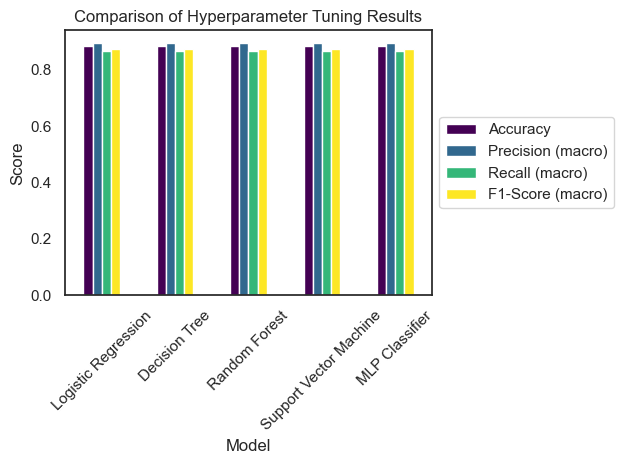

In [298]:
# Create a dictionary to store the hyperparameter tuning results
tuning_results = {
    'Model': [],
    'Accuracy': [],
    'Precision (macro)': [],
    'Recall (macro)': [],
    'F1-Score (macro)': [],
}

# Iterate through models and perform hyperparameter tuning
for model_name, model in models.items():
    # Train the tuned model
    tuned_model.fit(X_train_scaled, y_train)
    
    # Make predictions
    preds = tuned_model.predict(X_test_scaled)
    
    # Calculate macro-averaged metrics and add them to the dictionary
    tuning_results['Model'].append(model_name)
    tuning_results['Accuracy'].append(accuracy_score(y_test, preds))
    tuning_results['Precision (macro)'].append(precision_score(y_test, preds, average='macro'))
    tuning_results['Recall (macro)'].append(recall_score(y_test, preds, average='macro'))
    tuning_results['F1-Score (macro)'].append(f1_score(y_test, preds, average='macro'))

# Create a DataFrame from the tuning_results dictionary
tuning_results_df = pd.DataFrame(tuning_results)

# Visualize the comparison using a bar plot
plt.figure(figsize=(10, 6))
ax = tuning_results_df.plot(x='Model', kind='bar', colormap='viridis', rot=45)
plt.title('Comparison of Hyperparameter Tuning Results')
plt.xlabel('Model')
plt.ylabel('Score')

# Move the legend to the right side with some padding
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.tight_layout()

plt.show()


# Example Prediction

In [329]:
# Choose the Random Forest model after tuning
chosen_model = models['Random Forest']

# Prepare a new input data point for prediction
new_data_point = [[1.5,13.53,3.41,1.52,72.04,0.58,8.79,0.00,0.00]]     

# Perform prediction using the chosen model
predicted_class = chosen_model.predict(new_data_point)

# Print the predicted class
print(f"The predicted class for the input data point is: {predicted_class}")


The predicted class for the input data point is: [2]


In [330]:
# Choose the Random Forest model after tuning
chosen_model = models['Support Vector Machine']

# Prepare a new input data point for prediction
new_data_point = [[1.5,13.53,3.41,1.52,72.04,0.58,8.79,0.00,0.00]]   

# Perform prediction using the chosen model
predicted_class = chosen_model.predict(new_data_point)

# Print the predicted class
print(f"The predicted class for the input data point is: {predicted_class}")


The predicted class for the input data point is: [2]


In [331]:
# Choose the Random Forest model after tuning
chosen_model = models['MLP Classifier']

# Prepare a new input data point for prediction
new_data_point = [[1.5,13.53,3.41,1.52,72.04,0.58,8.79,0.00,0.00]]     

# Perform prediction using the chosen model
predicted_class = chosen_model.predict(new_data_point)

# Print the predicted class
print(f"The predicted class for the input data point is: {predicted_class}")


The predicted class for the input data point is: [2]


In [332]:
# Choose the Random Forest model after tuning
chosen_model = models['Decision Tree']

# Prepare a new input data point for prediction
new_data_point = [[1.5,13.53,3.41,1.52,72.04,0.58,8.79,0.00,0.00]]    

# Perform prediction using the chosen model
predicted_class = chosen_model.predict(new_data_point)

# Print the predicted class
print(f"The predicted class for the input data point is: {predicted_class}")


The predicted class for the input data point is: [1]


In [333]:
# Choose the Random Forest model after tuning
chosen_model = models['Logistic Regression']

# Prepare a new input data point for prediction
new_data_point = [[1.5,13.53,3.41,1.52,72.04,0.58,8.79,0.00,0.00]]   

# Perform prediction using the chosen model
predicted_class = chosen_model.predict(new_data_point)

# Print the predicted class
print(f"The predicted class for the input data point is: {predicted_class}")


The predicted class for the input data point is: [6]
